In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('titanic')

In [3]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
desc_stats = df.describe() 
print('stats breakdown', desc_stats)

stats breakdown          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


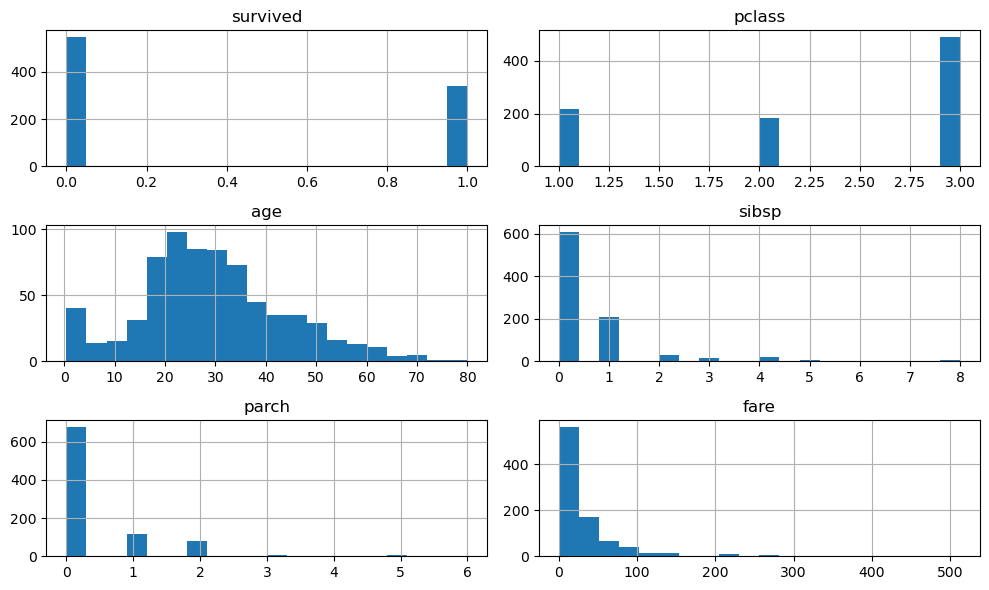

In [5]:
df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()


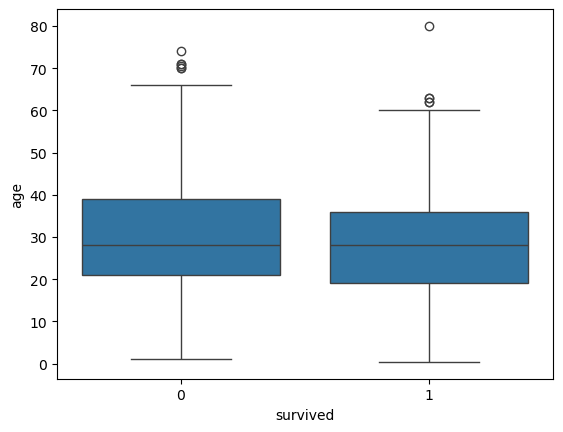

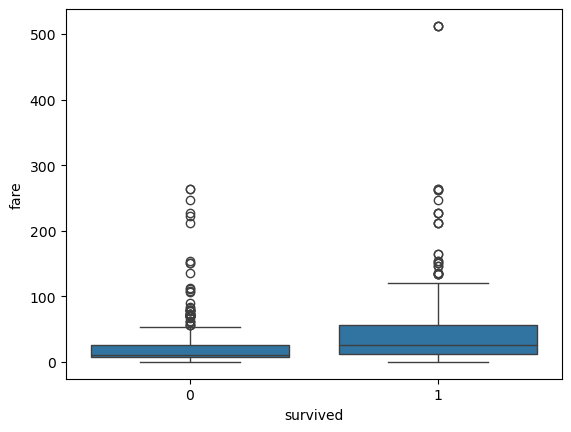

In [6]:
# Boxplots for checking for outliers in Age and Fare
sns.boxplot(x='survived', y='age', data=df)
plt.show()

sns.boxplot(x='survived', y='fare', data=df)
plt.show()

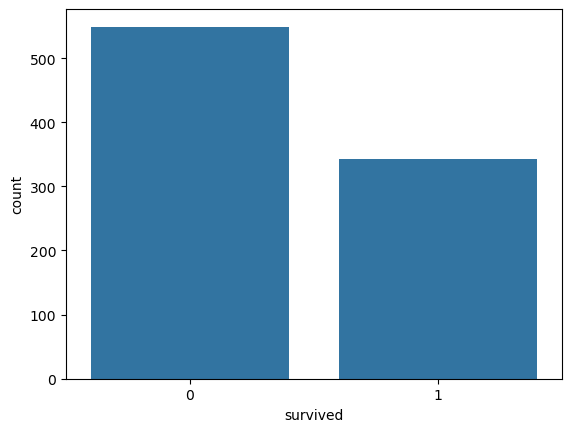

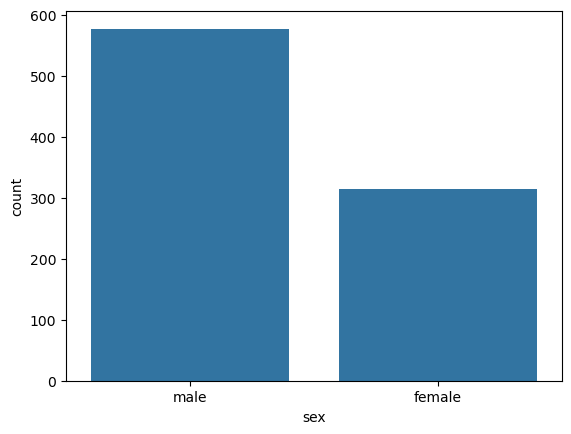

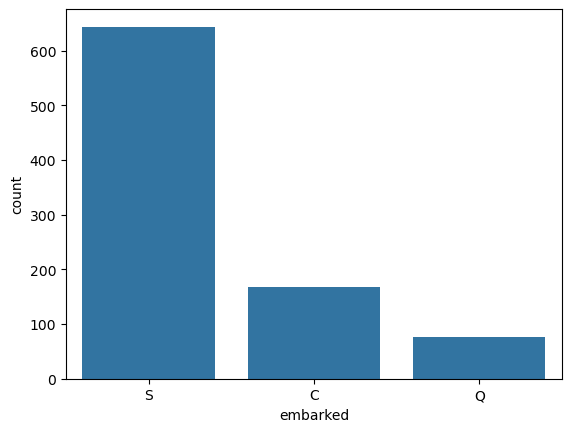

In [7]:
# Count plot for categorical data (Survived and Sex)
sns.countplot(x='survived', data=df)
plt.show()

sns.countplot(x='sex', data=df)
plt.show()

sns.countplot(x='embarked', data=df)
plt.show()

In [8]:
from scipy.stats import anderson

# Perform the Anderson-Darling test for normality on the 'Age' column
age_data = df['age'].dropna()  # Drop missing values

# Perform Anderson-Darling test
result = anderson(age_data)

print(f"Statistic: {result.statistic:.4f}")
print(f"Critical values: {result.critical_values}")
print(f"Significance level: {result.significance_level}")

# Interpretation
if result.statistic > result.critical_values[2]:
    print("Reject the null hypothesis: The data does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The data may follow a normal distribution.")


Statistic: 3.8230
Critical values: [0.573 0.652 0.783 0.913 1.086]
Significance level: [15.  10.   5.   2.5  1. ]
Reject the null hypothesis: The data does not follow a normal distribution.


In [9]:
# Mann-Whitney U Test for Fare between survivors and non-survivors
survived_fare = df[df['survived'] == 1]['fare'].dropna()
not_survived_fare = df[df['survived'] == 0]['fare'].dropna()

u_stat, p_value_u = stats.mannwhitneyu(survived_fare, not_survived_fare)
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value_u:.4f}")

U-statistic: 129951.5000
P-value: 0.0000


In [10]:
# Create a contingency table between Sex and Survived
contingency_table = pd.crosstab(df['sex'], df['survived'])

# Perform chi-square test
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value_chi2:.4f}")

Chi-square statistic: 260.7170
P-value: 0.0000


In [11]:
survived_fare = df[df['survived'] == 1]['fare'].dropna()
not_survived_fare = df[df['survived'] == 0]['fare'].dropna()

In [12]:
t_stat, p_value = stats.ttest_ind(survived_fare, not_survived_fare)
print(f"\nIndependent T-Test - T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")



Independent T-Test - T-statistic: 7.9392, P-value: 0.0000


In [13]:
fare_by_embarked = [df[df['embarked'] == port]['fare'].dropna() for port in df['embarked'].unique()]
f_stat, p_value_anova = stats.f_oneway(*fare_by_embarked)
print(f"\nOne-Way ANOVA - F-statistic: {f_stat:.4f}, P-value: {p_value_anova:.4f}")


One-Way ANOVA - F-statistic: nan, P-value: nan


c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [14]:
fare_survived = df[df['survived'] == 1]['fare'].dropna()
fare_not_survived = df[df['survived'] == 0]['fare'].dropna()
levne_stat, levene_p_stat = levene(fare_survived, fare_not_survived)
levene_stat, levene_p_value = levene(fare_survived, fare_not_survived)
print(f"\nLevene's Test for Equality of Variances - Statistic: {levene_stat:.4f}, P-value: {levene_p_value:.4f}")



Levene's Test for Equality of Variances - Statistic: 45.0996, P-value: 0.0000


In [15]:
# Cohen's D: Effect Size between Survived and Not Survived for Fare
pooled_std = np.sqrt(((len(survived_fare) - 1) * survived_fare.std()**2 + (len(not_survived_fare) - 1) * not_survived_fare.std()**2) / (len(survived_fare) + len(not_survived_fare) - 2))
cohens_d = (survived_fare.mean() - not_survived_fare.mean()) / pooled_std
print(f"\nCohen's D for Fare between Survived and Not Survived: {cohens_d:.4f}")




Cohen's D for Fare between Survived and Not Survived: 0.5469


In [16]:
N_interations = 1000 
bootstrap_fares = [] 
for _ in range(N_interations):
    resample = np.random.choice(df['fare'].dropna(), size=len(df['fare'].dropna()), replace=True)
    bootstrap_fares.append(np.mean(resample))

bootstrap_fares = np.array(bootstrap_fares)
lower_bound = np.percentile(bootstrap_fares, 2.5)
upper_bound = np.percentile(bootstrap_fares, 97.5)

print(f"Bootstrap Confidence Interval for Mean Fare: ({lower_bound:.2f}, {upper_bound:.2f})")


Bootstrap Confidence Interval for Mean Fare: (29.01, 35.82)


In [20]:
# Step 8: Principal Component Analysis (PCA)
# We will first scale the data and then apply PCA
features = ['age', 'fare', 'sibsp', 'parch']  # Choose relevant numerical features
titanic_data = df[features].dropna()

In [21]:
scaler = StandardScaler() 
titanic_scaled = scaler.fit_transform(titanic_data)

In [22]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(titanic_scaled)

In [23]:
# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

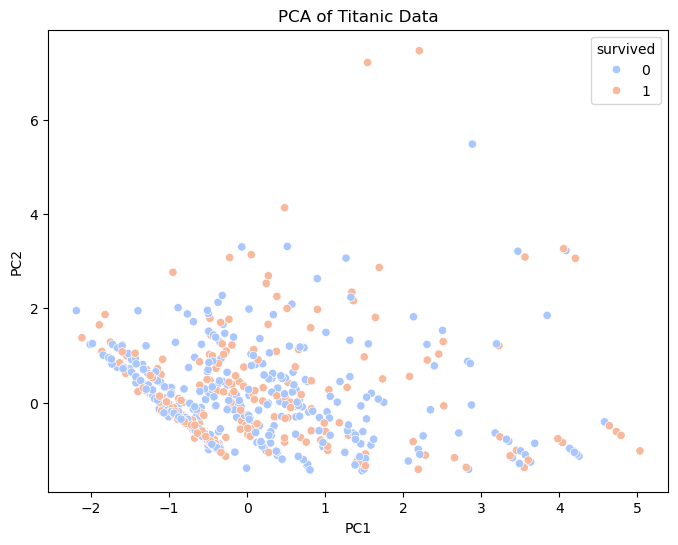

In [25]:
# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=df['survived'].dropna(), palette='coolwarm', legend='full')
plt.title('PCA of Titanic Data')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



Accuracy: 0.7483

Confusion Matrix:
 [[69 18]
 [18 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        87
           1       0.68      0.68      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



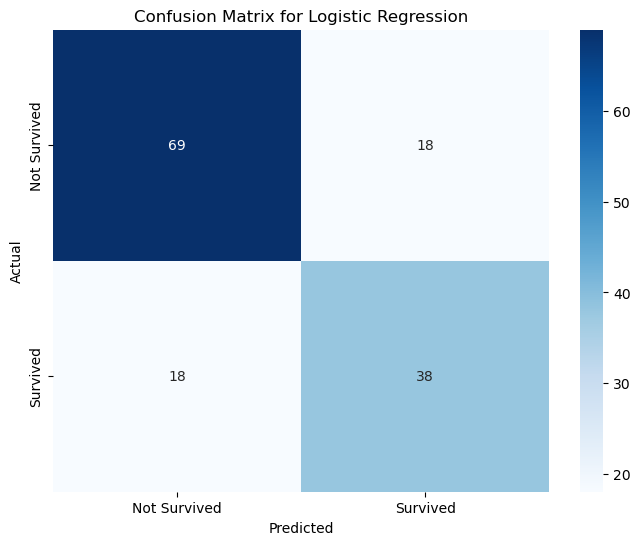

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data for classification
features = ['age', 'fare', 'sex']
target = 'survived'

# Drop missing values for simplicity
titanic_data = df[features + [target]].dropna()

# Encode categorical variables (e.g., Sex: male = 0, female = 1)
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})

# Define features and target variable
X = titanic_data[features]
y = titanic_data[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

